# Generalized Machine Learning 

- A spatial description of the ML problem 
- The bias/variance trade-off 
- Model selection and search 
- Generalized machine learning 
- Deploying machine learning models

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

## What is Machine Learning?

“A field of study that gives computers the ability to learn without being explicitly programmed.” 


Arthur Samuel (1959)

![Arthur Samuel](figures/arthur_samuel.jpg)


"As babies, we watch our environments and start to understand the structure of objects we encounter, but until a parent tells us what it is, we can’t put a name to it..." 

![Andrew Ng](figures/andrew_ng.jpg)

"...With Deep Learning, you just give the system a lot of data so it can discover by itself what some of the concepts in the world are. Last year, one of his algorithms taught itself to recognize cats after scanning millions of images on the internet. The algorithm didn’t know the word 'cat' — scientists had to supply that — but over time, it learned to identify the furry creatures we know as cats, all on its own."


Meta-cat:

![Cat Detection](figures/cat_detection.jpeg)


"Throughout the eighties and nineties, it was striking how many times people working within the 'ML community' realized that their ideas had had a lengthy pre-history in statistics. Decision trees, nearest neighbor, logistic regression, kernels, PCA, canonical correlation, graphical models, K- means and discriminant analysis come to mind, and also many general methodological principles..."

![Michael Jordan](figures/michael_jordan.jpeg)

"...In general, 'statistics' refers in part to an analysis style - a statistician is happy to analyze the performance of any system, ... if it takes in data that can be considered random and outputs decisions that can be considered uncertain..."

"...I don't think that the 'ML community' has developed many new inferential principles - or many new optimization principles - but I do think that the community has been exceedingly creative at taking existing ideas across many fields, and mixing and matching them to solve problems in emerging problem domains, and I think that the community has excelled at making creative use of new computing architectures." 


Michael Jordan (2014)

![Venn Diagram](figures/venn_diagram.png)

![Machine Learning Context to Data Mining and Statistics](figures/ml_context.png)

#### Data Science *is* Machine Learning 

The art of machine learning is to fit existing data to some model, creating a parameterized representation of the real world that is able to make decisions or predictions on new data based on previously discovered patterns. Models that are created from data are used in data products as the engines that create actionable results and generate even more data.

## The Machine Learning Problem

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. 

If each sample is more than a single number, for instance, a multidimensional entry (aka multivariate data), is it said to have several attributes or features.

### Learning from Examples

Given a bunch of examples (data) extract a meaningful pattern upon which to act.

![Learning from examples](figures/learning_from_ex.png)

### Categorized by Output Type

Input training data to fit a model which is then used to predict incoming inputs into ...

![Categorized by output type](figures/cat_by_output.png)

### Terminology

“Model” is an overloaded term.

• Model family describes, at the broadest possible level, the connection between the variables of interest. 

• Model form specifies exactly how the variables of interest are connected within the framework of the model family. 

• A fitted model is a concrete instance of the model form where all parameters have been estimated from data, and the model can be used to generate predictions.


Hadley Wickham (2015)

## Regression

### Hypothesis

![regression](figures/regression.png)

Given continuous input data fit a function that is able to predict the continuous value of input given other data.

In [2]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor


boston = load_boston()

model = RandomForestRegressor()
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


print("Random forest regression model on Boston housing dataset")
print("Mean squared error: {}".format(mse(expected, predicted)))
print("R2 score: {}".format(r2_score(expected, predicted)))

Random forest regression model on Boston housing dataset
Mean squared error: 1.8013905138339914
R2 score: 0.9786614548114699


## Classification

### Hypothesis

![classification](figures/classification.png)

Given labeled input data (with two or more labels), fit a function that can determine for any input, what the label is. 

In [4]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC


iris = load_iris()

model = SVC()
model.fit(iris.data, iris.target)

expected = iris.target
predicted = model.predict(iris.data)

In [5]:
from sklearn.metrics import classification_report


classes = ['setosa', 'versicolor', 'virginica']

print("SVM Classifier on Iris dataset")
print(classification_report(expected, predicted, target_names=classes))


SVM Classifier on Iris dataset
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       1.00      0.96      0.98        50
  virginica       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150



## Clustering

### Hypothesis

![clustering](figures/clustering.png)

Given data, determine a pattern of associated data points or clusters via their similarity or distance from one another. 

In [6]:
import os
import requests 


UCI_CUSTOMER_DATA_URL = "https://bit.ly/2COHM14"
response = requests.get(UCI_CUSTOMER_DATA_URL)
outpath  = os.path.abspath("data/customers.txt")
with open(outpath, 'wb') as f:
    f.write(response.content)

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


cols = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]
data = pd.read_csv("data/customers.txt", usecols=cols)
customers = data.values

pca = PCA(n_components=2)
reduced = pca.fit_transform(customers)

model = KMeans(n_clusters=3)
model.fit(reduced)

labels = model.labels_
centroids = model.cluster_centers_

In [8]:
from sklearn.metrics import silhouette_score


print("Silhouette score of KMeans (k=3) on the Customer dataset")
print(silhouette_score(reduced, labels))

Silhouette score of KMeans (k=3) on the Customer dataset
0.5229120824043509


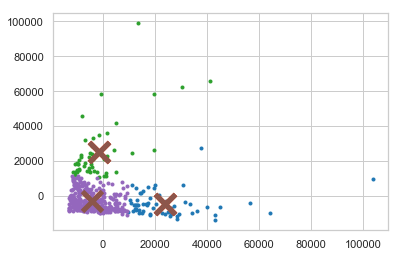

In [9]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(3):
    datapoints = reduced[np.where(labels==i)]
    plt.plot(datapoints[:,0],datapoints[:,1],'.')
    centers = plt.plot(centroids[:,0],centroids[:,1],'x')
    plt.setp(centers,markersize=20.0)
    plt.setp(centers,markeredgewidth=5.0)

plt.show()

## Generalized Machine Learning

### Models: Instance Methods

Compare instances in data set with a similarity measure to find best matches. 

Suffers from curse of dimensionality. 

Focus on feature representation and similarity metrics between instances

 - k-Nearest Neighbors (kNN)
 - Self-Organizing Maps (SOM)
 - Learning Vector Quantization (LVQ)


#### Regression Models

Model relationship of independent variables, X to dependent variable Y by iteratively optimizing error made in predictions.

 - Ordinary Least Squares
 - Logistic Regression
 - Stepwise Regression
 - Multivariate Adaptive Regression Splines (MARS)
 - Locally Estimated Scatterplot Smoothing (LOESS)


#### Regularization Methods

Extend another method (usually regression), penalizing complexity (minimize overfit)

simple, popular, powerful 

better at generalization

 - Ridge Regression (L2)
 - LASSO (Least Absolute Shrinkage & Selection Operator) (L1)
 - Elastic Net (L1 + L2)


#### Decision Trees

Model of decisions based on data attributes. Predictions are made by following forks in a tree structure until a decision is made. Used for classification & regression.

 - Classification and Regression Tree (CART)
 - Decision Stump
 - Random Forest
 - Multivariate Adaptive Regression Splines (MARS)
 - Gradient Boosting Machines (GBM)


#### Bayesian Models

Explicitly apply Bayes’ Theorem for classification and regression tasks. Usually by fitting a probability function constructed via the chain rule and a naive simplification of Bayes.

 - Naive Bayes
 - Averaged One-Dependence Estimators (AODE)
 - Bayesian Belief Network (BBN)


#### Kernel Methods

Map input data into higher dimensional vector space where the problem is easier to model. Named after the “kernel trick” which computes the inner product of images of pairs of data.

 - Support Vector Machines (SVM)
 - Radial Basis Function (RBF)
 - Linear Discriminant Analysis (LDA)


#### Clustering Methods

Organize data into groups whose members share maximum similarity (defined usually by a distance metric). Two main approaches: centroids and hierarchical clustering.

 - k-Means
 - Affinity Propagation
 - OPTICS (Ordering Points to Identify Cluster Structure)
 - Agglomerative Clustering


#### Artificial Neural Networks

Inspired by biological neural networks, ANNs are nonlinear function approximators that estimate functions with a large number of inputs.

System of interconnected neurons that activate 

Deep learning extends simple networks recursively

 - Perceptron
 - Back-Propagation
 - Hopfield Network
 - Restricted Boltzmann Machine (RBM)
 - Deep Neural Networks (DBN)


#### Ensemble Models

Models composed of multiple weak models that are trained independently and whose outputs are combined to make an overall prediction.

 - Boosting
 - Bootstrapped Aggregation (Bagging)
 - AdaBoost
 - Stacked Generalization (blending)
 - Gradient Boosting Machines (GBM)
 - Random Forest


#### Other Models

The list before was not comprehensive, other algorithm and model classes include:

 - Conditional Random Fields (CRF)
 - Markovian Models (HMMs)
 - Dimensionality Reduction (PCA, PLS)
 - Rule Learning (Apriori, Brill)
 - More ...


### Features

In order to do machine learning you need a data set containing instances (examples) that are composed of features from which you compose dimensions. 

**Instance**: a single data point or example composed of fields

**Feature**: a numeric quantity describing an instance 

**Dimension**: one or more attributes that describe a property

![feature space](figures/feature_space.png)

In [10]:
from sklearn.datasets import load_digits


digits = load_digits()

X = digits.data      # X.shape == (n_samples, n_features)
y = digits.target    # y.shape == (n_samples,)

Feature space refers to the n-dimensions where your variables live (not including a target variable or class). The term is used often in ML literature because in ML all variables are features (usually) and feature extraction is the art of creating a space with decision boundaries. 

**Target**
Y ≡ Thickness of car tires after some testing period

**Variables**
X1 ≡ distance travelled in test
X2 ≡ time duration of test
X3 ≡ amount of chemical C in tires

The feature space is R3, or more accurately, the positive quadrant in R3 as all the X variables can only be positive quantities. 

### Parameters and Hyperparameters

Domain knowledge about tires might suggest that the speed the vehicle was moving at is important, hence we generate another variable, X4 (this is the feature extraction part):

X4 = X1 / X2 ≡ the speed of the vehicle during testing.

This extends our old feature space into a new one, the positive part of R4.

A mapping is a function, ϕ, from R3 to R4:

ϕ(x1,x2,x3) = (x1,x2,x3,x1x2)

![mapping](figures/mapping.jpg)

### Feature Engineering

“feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success... Much of the success of machine learning is actually success in engineering features that a learner can understand.” 

Scott Locklin, in “Neglected machine learning ideas”

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

Jason Brownlee, in “Discover Feature Engineering”

## Machine Learning API

![Choosing the Right Estimator](figures/choosing_estimator.png)

Object-oriented interface centered around the concept of an Estimator: 

“An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.”

Scikit-Learn Tutorial

### Estimators

 - `fit(X,y)` sets the state of the estimator.
 - `X` is usually a 2D `numpy` array of shape `(num_samples, num_features)`.
 - `y` is a 1D array with shape `(n_samples,)`
 - When can `y` be `None`?
 - `Fit` returns `self`. 


In [11]:
class Estimator(object):
    
    def get_params(self):
        """
        Returns a dictionary of all hyperparams 
        """
        pass 

    def set_params(self, **params):
        """
        Sets hyperparams on the instance 
        """
        pass 

    def fit(self, X, y=None, **kwargs):
        """
        Fit the estimator from data
        """
        # Modify state of self 
        return self

### Predictors

 - `predict(X)` returns the class or value
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - Returns a 1D vector with shape `(n_rows,)`
 - `predict_proba()` returns a 2D array of shape `(n_rows, n_classes)`

In [12]:
class Predictor(Estimator):
    
    def predict(self, X, **kwargs):
        """
        Predict values for each row in X 
        """
        return y_hat

```python
from sklearn import svm

estimator = svm.SVC(gamma=0.001)
estimator.fit(X, y)
estimator.predict(x)
```

### Models 

 - `score(X, y=None)` returns a descriptive metric between 0 and 1 where 0 is bad and 1 is good. 
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - `y` is optionally a 1D vector with "correct labels"

In [13]:
class Model(Predictor):
    
    def score(self, X, y=None, **kwargs):
        """
        Return a score between 0 and 1
        """
        return score

### Transformers

 - `transform(X)` transforms input data to prepare it for ML.
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - `X_prime` is a 2D `numpy` array with shape `(m_rows, m_features)`

In [14]:
class Transformer(Estimator):
    
    def transform(self, X, **kwargs):
        """
        Modifies X and returns a new X' 
        """
        return X_prime

### Data Preprocessing

Scikit-Learn provides a utility package, preprocessing to transform raw feature vectors into representations that assist downstream processing, including:

**Standardization**: transform data to mean = zero and unit variance. 
**Scaling**: transform feature to lie between range, usually `[0,1]`
**Normalization**: scaling features to a unit norm
**Binarization**: thresholding features to get binary values
**Label Encoding**: transforming labels to numeric values
**Imputation**: infer missing values from known parts of the data
**Data Reduction**: use unsupervised methods to reduce dimensionality.

### Pipelines

The purpose of the pipeline is to assemble several steps that can be cross-validated and operationalized together.

Sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement `fit()` and `transform()` methods. The final estimator only needs to implement `fit()`.

In [15]:
class Pipeline(Transformer):

    @property
    def named_steps(self):
        """
        Sequence of estimators
        """
        return self.steps

    @property
    def _final_estimator(self):
        """
        Terminating estimator
        """
        return self.steps[-1]


## Model Selection

Ok, I’ve fitted a model. How do I know if it’s any good?

### Model Selection Triple

![Model Selection Triple](figures/model_selection_triple.png)

### A Search Problem

### Visual Steering

## Complexity

### Underfitting

### Overfitting

### Cross-Validation

### Bias and Variance

### Sources of Complexity

### Interpretability

## Deployment

### Classification/Regression Workflow

### Clustering Workflow

### Data Product Pipeline